This is to analyse the temperature and photodiode balance in the room from 4.30pm, 18th August 2023 until 8am, 21st August 2023.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as scisig
import scipy.io as sio
import scipy.optimize as opt

In [38]:
filepath = 'D:\\Experiment\\Temperature\\230818\\Balance\\Balance_'
filelist = ['1', '2', '3', '4', '5']
x = []
y = []
for i in filelist:
    data = sio.loadmat(filepath + i + '.mat')
    x = np.concatenate((x, np.transpose(data['A'])[0]))
    y = np.concatenate((y, np.transpose(data['B'])[0]))

maxtime = len(x)*data['Tinterval'][0][0]
timexy = np.linspace(0, maxtime, len(x))

In [67]:
import pandas as pd

df = pd.read_csv('D:\\Experiment\\Temperature\\230818\\Temperature.csv', delimiter = ';')

# Time [s];Date;Time;Temperature[C];Humidity[%];TH1[C];TH2[C]

T1 = list(df['TH1[C]'])
T2 = list(df['Temperature[C]'])
timeT = np.array(df['Time [s]'])

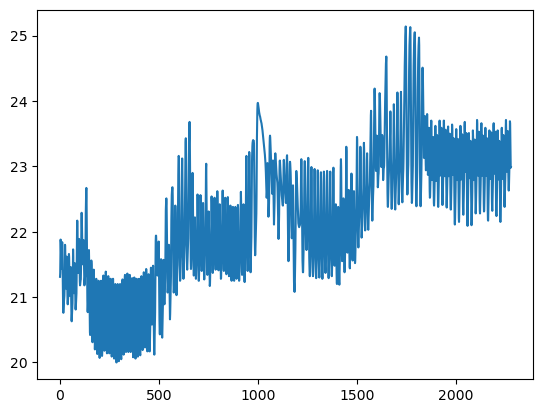

In [68]:
plt.plot(T2)

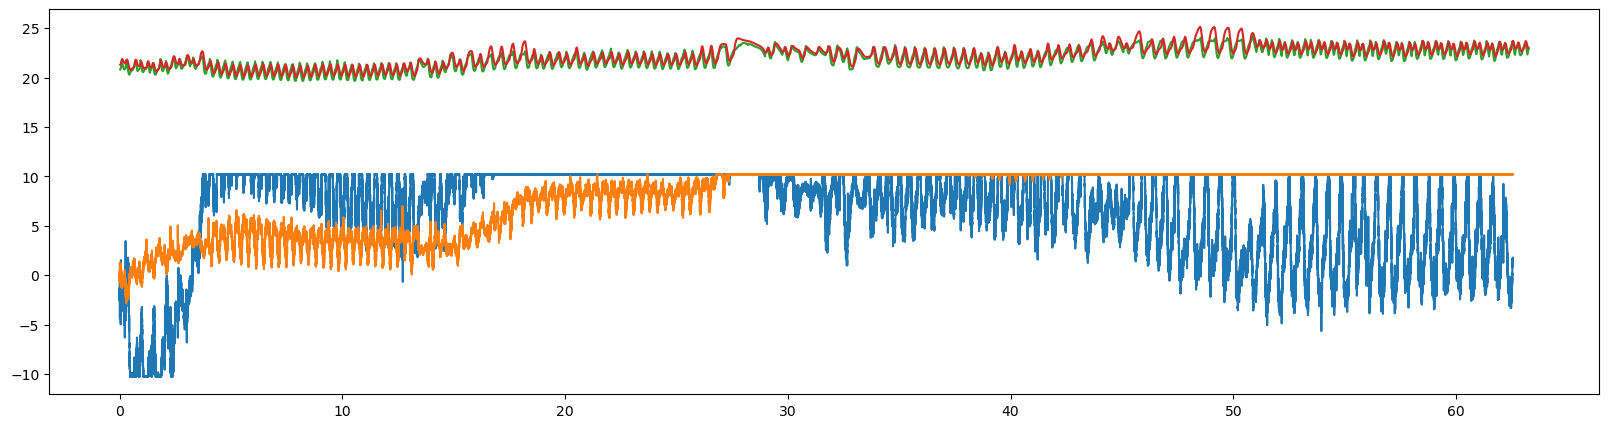

In [69]:
plt.figure(figsize = (20, 5))
plt.plot(timexy/3600, x)
plt.plot(timexy/3600, y)
plt.plot(timeT/3600, T1)
plt.plot(timeT/3600, T2)

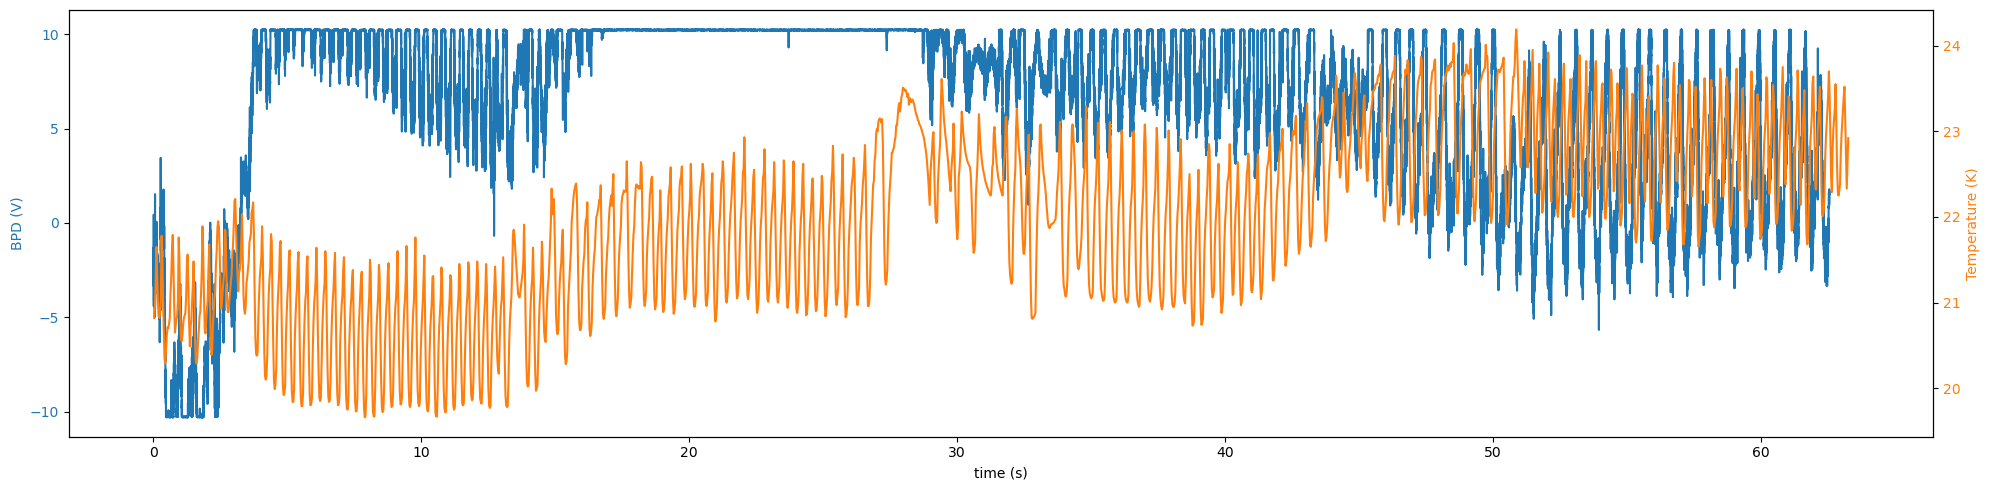

In [52]:
fig, ax1 = plt.subplots(figsize = (20, 5))

color = 'tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('BPD (V)', color=color)
ax1.plot(timexy/3600, x, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Temperature (K)', color=color)  # we already handled the x-label with ax1
ax2.plot(timeT/3600, T1, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

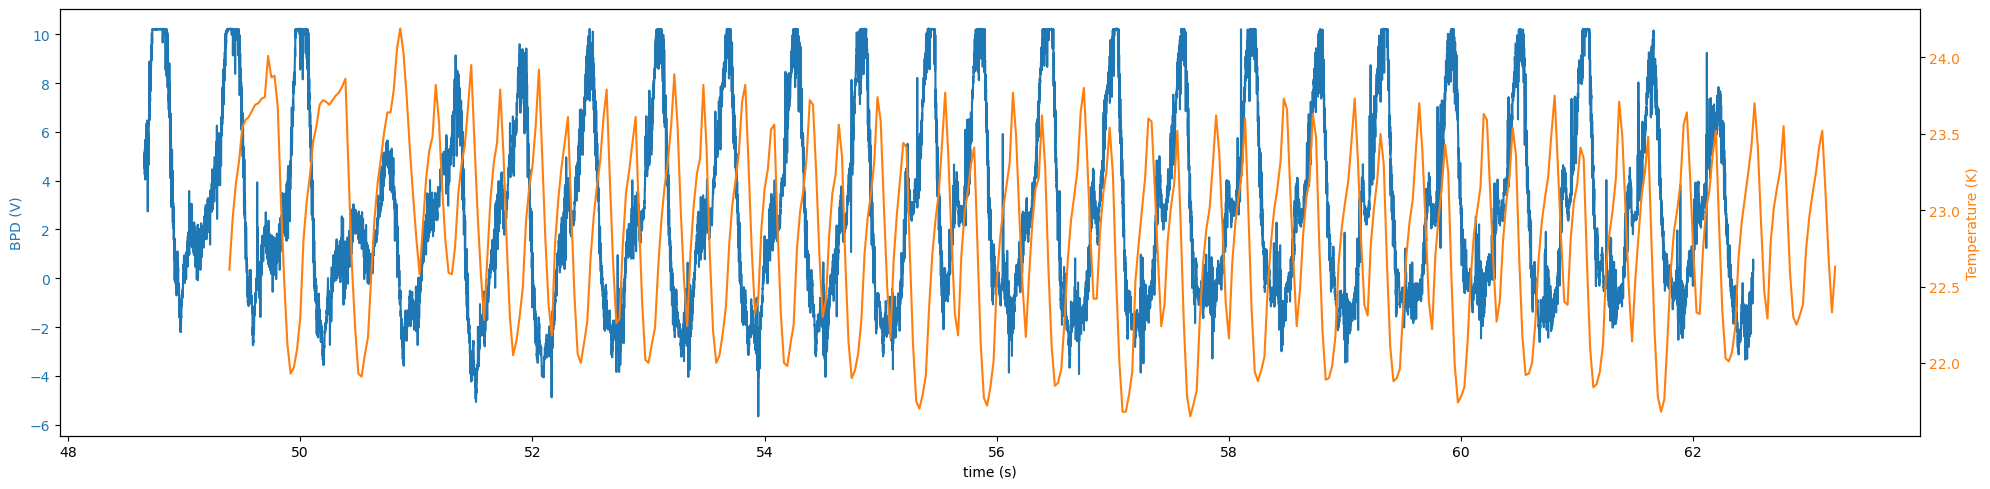

In [55]:
lb = -500
ub = -1
fig, ax1 = plt.subplots(figsize = (20, 5))

color = 'tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('BPD (V)', color=color)
ax1.plot(timexy[lb*30:ub*30]/3600, x[lb*30:ub*30], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Temperature (K)', color=color)  # we already handled the x-label with ax1
ax2.plot(timeT[lb:ub]/3600, T1[lb:ub], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

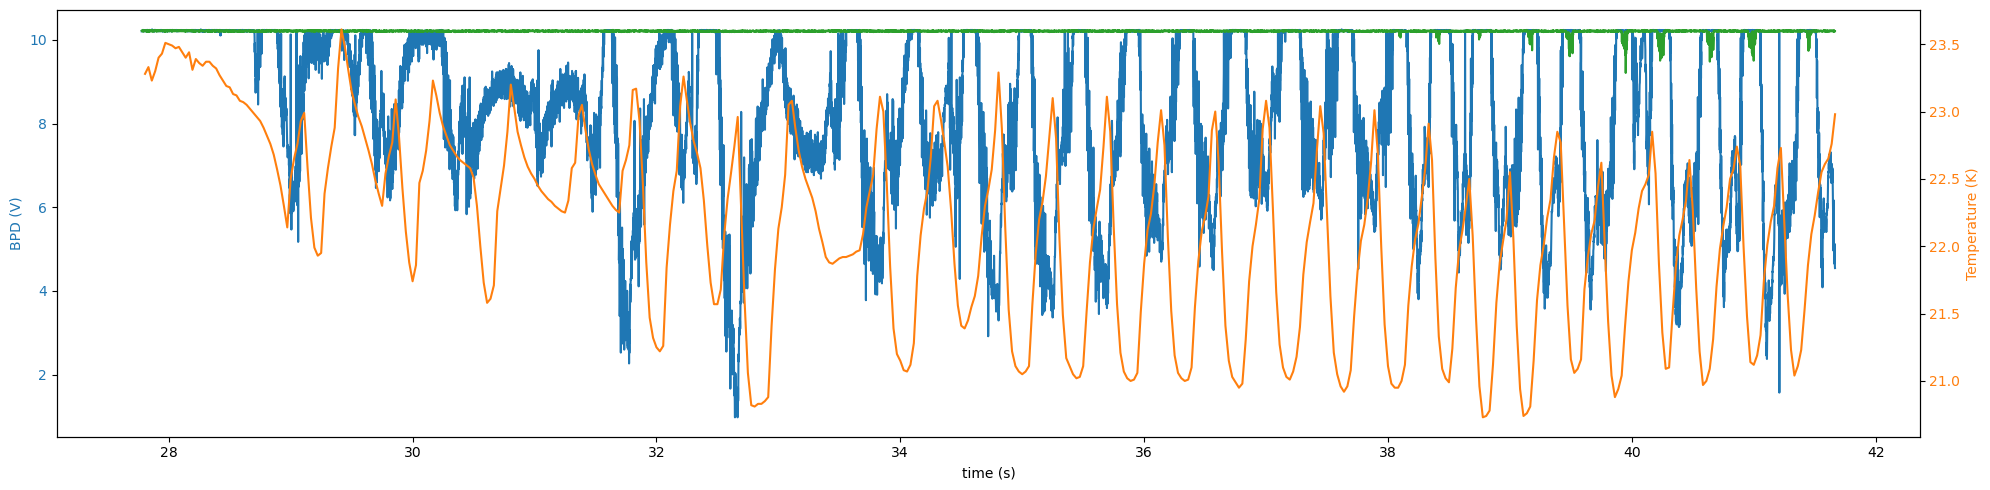

In [62]:
lb = 1000
ub = 1500
fig, ax1 = plt.subplots(figsize = (20, 5))

color = 'tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('BPD (V)', color=color)
ax1.plot(timexy[lb*30:ub*30]/3600, x[lb*30:ub*30], color=color)
ax1.plot(timexy[lb*30:ub*30]/3600, y[lb*30:ub*30], color='tab:green')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Temperature (K)', color=color)  # we already handled the x-label with ax1
ax2.plot(timeT[lb:ub]/3600, T1[lb:ub], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

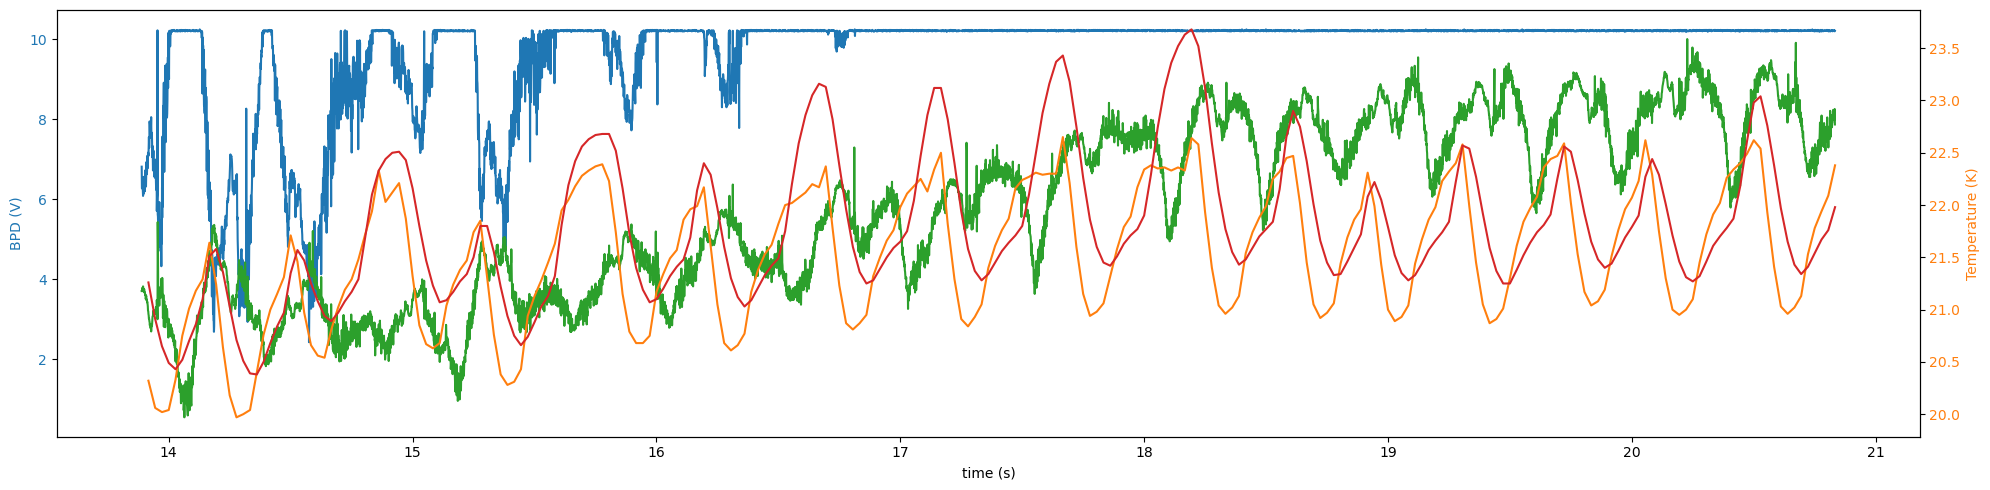

In [70]:
lb = 500
ub = 750
fig, ax1 = plt.subplots(figsize = (20, 5))

color = 'tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('BPD (V)', color=color)
ax1.plot(timexy[lb*30:ub*30]/3600, x[lb*30:ub*30], color=color)
ax1.plot(timexy[lb*30:ub*30]/3600, y[lb*30:ub*30], color='tab:green')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Temperature (K)', color=color)  # we already handled the x-label with ax1
ax2.plot(timeT[lb:ub]/3600, T1[lb:ub], color=color)
ax2.plot(timeT[lb:ub]/3600, T2[lb:ub], color='tab:red')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()